In [65]:
import numpy
import mnist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [66]:
mndata = mnist.MNIST('../Datasets/MNIST/raw/')
mndata.load_testing()

X = mndata.test_images
X0 = numpy.asarray(X)[:1000, :] / 256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

In [67]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)

<class 'numpy.ndarray'>
(784, 10)


In [68]:
import display_network

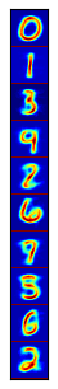

In [69]:
A = display_network.display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap='jet')
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

In [70]:
plt.savefig('a1.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [71]:
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

In [72]:
image = cmap(norm(A))

In [73]:
plt.imsave('aa.png', image)

In [74]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [77]:
N0 = 20
X1 = numpy.zeros((N0 * K, 784))
X2 = numpy.zeros((N0 * K, 784))

In [78]:
for k in range(K):
    Xk = X0[pred_label == k, :]
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    X1[N0 * k : N0 * k + N0, :] = Xk[nearest_id, :]
    X2[N0 * k : N0 * k + N0, :] = Xk[:N0, :]

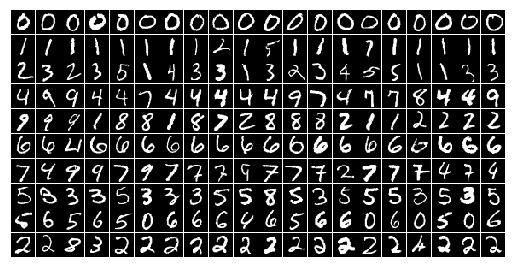

In [79]:
plt.axis('off')
A = display_network.display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest')
plt.gray()
plt.show()

In [56]:
import matplotlib.image

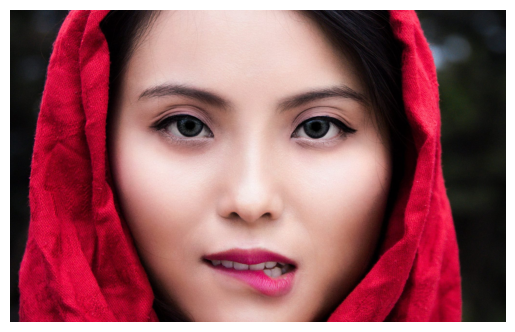

In [57]:
img = matplotlib.image.imread('girl.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [58]:
X = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

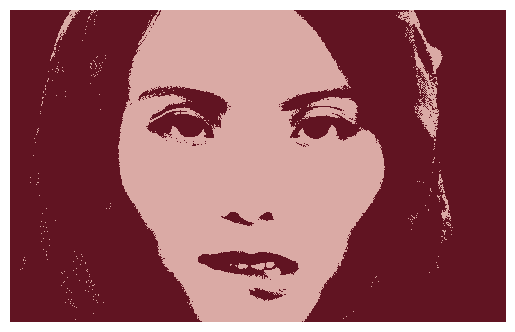

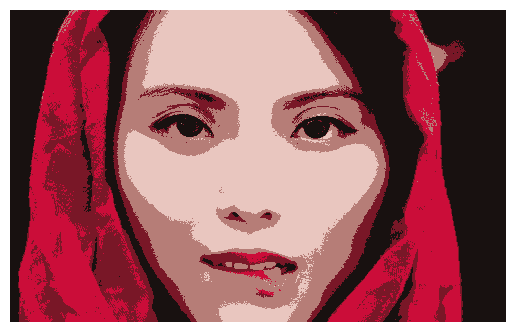

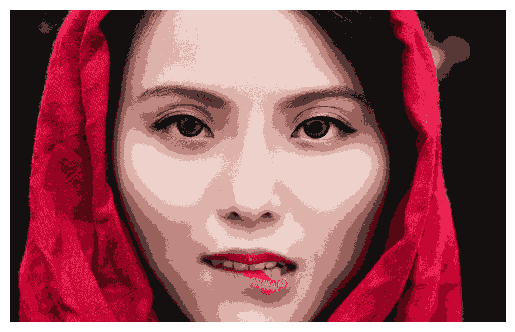

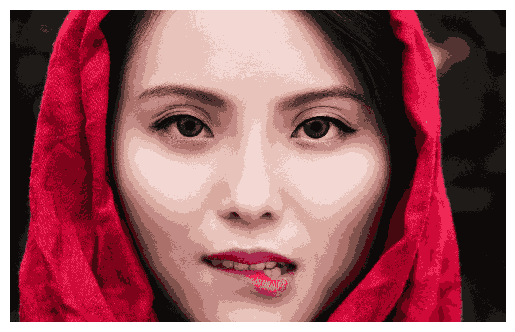

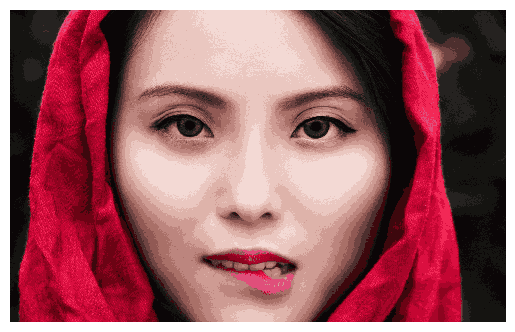

In [62]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)
    image1 = numpy.zeros_like(X)

    for k in range(K):
        image1[label == k] = kmeans.cluster_centers_[k]

    image2 = image1.reshape((img.shape[0], img.shape[1], img.shape[2]))

    plt.imshow(image2, interpolation='nearest')
    plt.axis('off')
    plt.show()

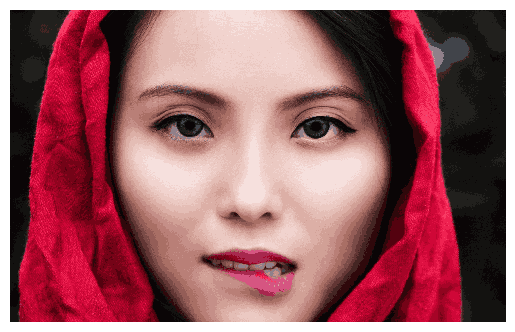

In [64]:
for K in [30]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)
    image1 = numpy.zeros_like(X)

    for k in range(K):
        image1[label == k] = kmeans.cluster_centers_[k]

    image2 = image1.reshape((img.shape[0], img.shape[1], img.shape[2]))

    plt.imshow(image2, interpolation='nearest')
    plt.axis('off')
    plt.show()